# How Does a Bike-Share Navigate Speedy Success?

### Introduction
Cyclistic is a bike-share company in Chicago. Our future success depends on maximizing the number of annual memberships. Therefore, we wants to understand how casual riders and annual members use Cyclistic bikes differently.

To perform data analysis, the APPASA process was followed: 
(1) Ask 
(2) Prepare 
(3) Process 
(4) Analyze 
(5) Share 
(6) Act

In this case study, various data analysis tools have been applied such as Google sheet, Excel and R programming. Alternatively, this case study can be performed SQL for handling Big Data and Python using NumPy. 

## (1) Ask

### Background
Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

### Objectives
* Maximize the number of annual numbers.
* Explore how to covert casual riders into members

### Questions
* How do annual members and casual riders use Cyclistic bikes differently?

### About Datasets
Cyclistic’s historical trip data to analyze and identify trends. 
(Note: The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, the datasets are appropriate and will enable you to answer the business questions. The data has been made available by Motivate International Inc. under this license.) 

This is public data that you can use to explore how different customer types are using Cyclistic bikes. But note that data-privacy issues prohibit you from using riders’ personally identifiable information. This means that you won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.

## (2) Data Preparation
* Dataset has been downloaded from [here](http://divvy-tripdata.s3.amazonaws.com/index.html).
* Among the datasets, the 2022 dataset has been particularly downloaded.

## (3) Data Processing
* The prepared data was organized by using google sheets and microsoft excel. 
* To identify the length of each ride, the data was manipulated by subtracting the column “started_at” from the column “ended_at”.
* Furthermore, it was formatted as HH:MM:SS. 
* Next, the new column was created and called “day_of_week,” and calculate the day of the week that each ride started.

### Data cleaning
* Using Vlookup, the data which could not be possible to exist in the real world were removed. This function is to find things in a table or a range by row. 
* This performance lead that the length of each ride should be less than 24 hours and null data which suppose to be 'zero' for performing numerical calculation.  
* After removing this abnormality, the data can be considered as clean data. 

## (4) Analyze
* Using pivot table, descriptive statictics was applied on Excel and Google sheet. 
* This is extracting the critical information from each month to analyze the behaviours of member riders and casual riders stated in the question. 
* From pivot table, data of every month can be manipulated as followed: the mean of ride_length, the max ride_length and the mode (frequency) of day_of_week. 
* Additionally, the behaviours of member riders and casual riders can be comparable by catagorizing in pivot table. 
* Lastly, all the data from pivot tables of every month were merged into a yearly table.

## (5) Share
* The final result was shown in graph below.

![Overall number of riders.png](attachment:91181c7e-faf6-4c1a-a9c3-1a3b983c6dbe.png)

![Overall Ride_Length.png](attachment:eaff8990-d1e7-4eb7-aac0-264c1f85831b.png)

Based on the above graph, it can be interpreted as 
* The highest number of bike rides (casual members) use bikes in July.

Therefore, as a next step, data in July was analyzed using R programming.

# Installing packages
Notes: setting up R environment by loading the 'rmarkdown', 'tidyverse', and 'lubridate' packages.

In [1]:
install.packages("tidyverse")
install.packages('lubridate')
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Loading packages

In [2]:
list.files(path= "../input")

[1] "july-bike-sharing"

In [3]:
library(ggplot2) #visualize data
library(tidyverse) #wrangle data
library(lubridate) #wrangle data attributes
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.1      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# (1) Data Preparation

In [4]:
# Insert July data from Excel
tripdata <- read_excel('/kaggle/input/july-bike-sharing/202207-divvy-tripdata.xlsx')

In [5]:
# Slice the length of ride into time format(hour:minute:second)
tripdata$Time <- format(as.POSIXct(tripdata$ride_of_length),format="%H:%M:%S")

In [6]:
# Inspect the data frames and look for inconsistencies
str(tripdata)

tibble [1,048,575 × 16] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:1048575] "954144C2F67B1932" "292E027607D218B6" "57765852588AD6E0" "B5B6BE44314590E6" ...
 $ rideable_type     : chr [1:1048575] "classic_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:1048575], format: "2022-07-05 08:12:47" "2022-07-26 12:53:38" ...
 $ ended_at          : POSIXct[1:1048575], format: "2022-07-05 08:24:32" "2022-07-26 12:55:31" ...
 $ start_station_name: chr [1:1048575] "Ashland Ave & Blackhawk St" "Buckingham Fountain (Temp)" "Buckingham Fountain (Temp)" "Buckingham Fountain (Temp)" ...
 $ start_station_id  : chr [1:1048575] "13224" "15541" "15541" "15541" ...
 $ end_station_name  : chr [1:1048575] "Kingsbury St & Kinzie St" "Michigan Ave & 8th St" "Michigan Ave & 8th St" "Woodlawn Ave & 55th St" ...
 $ end_station_id    : chr [1:1048575] "KA1503000043" "623" "623" "TA1307000164" ...
 $ start_lat         : chr [1:1048575] "41907066" "418696207474812

In [7]:
# Recheck the summary of data
summary(tripdata)

   ride_id          rideable_type        started_at                 
 Length:1048575     Length:1048575     Min.   :2022-07-01 00:00:01  
 Class :character   Class :character   1st Qu.:2022-07-09 10:03:37  
 Mode  :character   Mode  :character   Median :2022-07-16 21:27:40  
                                       Mean   :2022-07-16 21:54:40  
                                       3rd Qu.:2022-07-24 16:42:55  
                                       Max.   :2022-07-31 23:59:58  
                                       NA's   :225087               
    ended_at                   start_station_name start_station_id  
 Min.   :2022-07-01 00:06:23   Length:1048575     Length:1048575    
 1st Qu.:2022-07-09 10:22:59   Class :character   Class :character  
 Median :2022-07-16 21:51:13   Mode  :character   Mode  :character  
 Mean   :2022-07-16 22:16:04                                        
 3rd Qu.:2022-07-24 17:06:14                                        
 Max.   :2022-08-04 13:53:01      

In [8]:
# Remove unnecessary columns from data frame
tripdata <- tripdata %>% 
  select(-c(start_lat,start_lng,end_lat,end_lng))

In [9]:
# Show the summary of the member vs causual from data frame
table(tripdata$member_casual)


casual member 
406055 417433 

# (2) Data Processing

In [10]:
# Add columns that list the date, month, day, and year of each ride
tripdata$date <- as.Date(tripdata$started_at) # the default format is yyyy-mm-dd
tripdata$month <- format(as.Date(tripdata$date), "%B")
tripdata$day <- format(as.Date(tripdata$date), "%d")
tripdata$year <- format(as.Date(tripdata$date), "%Y")
tripdata$day_of_week <- format(as.Date(tripdata$date), "%a")

# (3) Data Analyzing

In [11]:
# Calculate the "ride_len" and add a new column
tripdata$ride_len <- difftime(tripdata$ended_at, tripdata$started_at, units = "mins")

In [12]:
# Convert "ride_len" from factor to numeric for further numerical calculations
is.factor(tripdata$ride_len)
tripdata$ride_len <- as.numeric(as.character(tripdata$ride_len))
is.numeric(tripdata$ride_len)

[1] FALSE

[1] TRUE

In [13]:
# Remove trips that the ride len is <= 0 or more than one day 
# Make a copy for the cleaned data frame (tripdata_v2)
tripdata_v2 <- tripdata[!(tripdata$ride_len > 1440 | tripdata$ride_len <= 0),]
str(tripdata_v2)

tibble [1,047,644 × 17] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:1047644] "954144C2F67B1932" "292E027607D218B6" "57765852588AD6E0" "B5B6BE44314590E6" ...
 $ rideable_type     : chr [1:1047644] "classic_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:1047644], format: "2022-07-05 08:12:47" "2022-07-26 12:53:38" ...
 $ ended_at          : POSIXct[1:1047644], format: "2022-07-05 08:24:32" "2022-07-26 12:55:31" ...
 $ start_station_name: chr [1:1047644] "Ashland Ave & Blackhawk St" "Buckingham Fountain (Temp)" "Buckingham Fountain (Temp)" "Buckingham Fountain (Temp)" ...
 $ start_station_id  : chr [1:1047644] "13224" "15541" "15541" "15541" ...
 $ end_station_name  : chr [1:1047644] "Kingsbury St & Kinzie St" "Michigan Ave & 8th St" "Michigan Ave & 8th St" "Woodlawn Ave & 55th St" ...
 $ end_station_id    : chr [1:1047644] "KA1503000043" "623" "623" "TA1307000164" ...
 $ member_casual     : chr [1:1047644] "member" "casual" "casual" 

In [14]:
# Check no missing value in the column "day_of_week" and "rideable_type"
tripdata_v2 <- tripdata_v2[complete.cases(tripdata_v2$day_of_week),]
tripdata_v2 <- tripdata_v2[complete.cases(tripdata_v2$rideable_type),]

In [15]:
# Arrange days of the week in order
tripdata_v2$day_of_week <- ordered(tripdata_v2$day_of_week, 
                                    levels = c("Mon","Tue", "Wed","Thu", "Fri", "Sat", "Sun"))

# (4) Data Sharing 
## Image (1) - Visualize the number of bike rides by catagorizing the member and casual riders

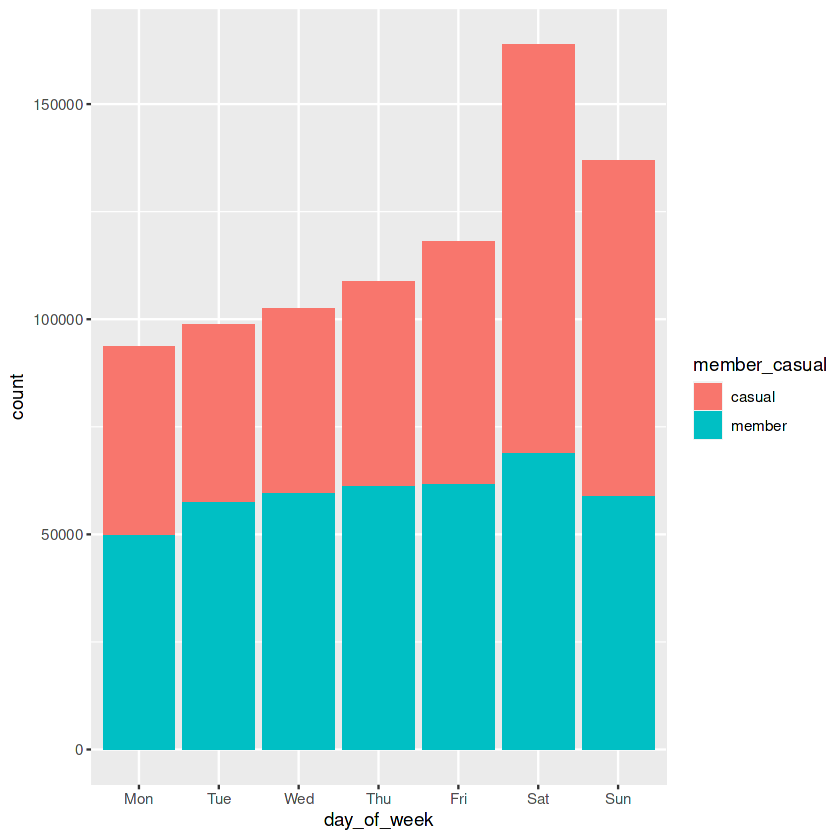

In [16]:
ggplot(data=tripdata_v2)+geom_bar(mapping = aes(x=day_of_week,fill=member_casual))

## Image (2) - Amplifying the previous result, visualize the mode of bike rides by casual riders

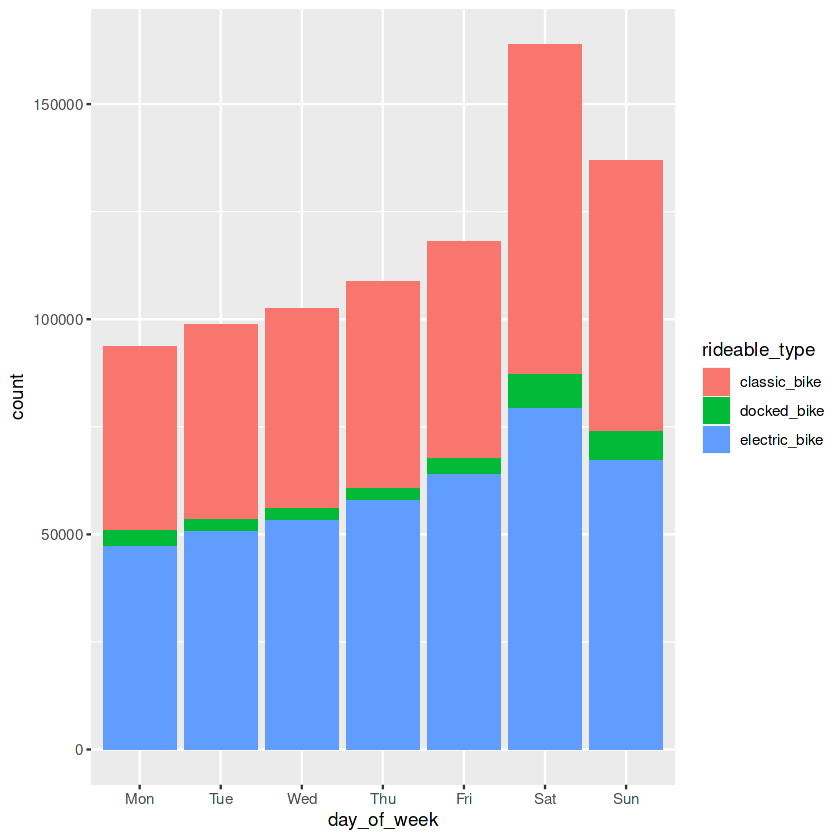

In [17]:
ggplot(data=tripdata_v2)+geom_bar(mapping = aes(x=day_of_week,fill=rideable_type))

## Create a standard theme

In [18]:
options(repr.plot.width = 6, repr.plot.height = 8)

theme_v1 = theme(plot.title=element_text(size=16),
                 axis.text.x=element_text(size=14), 
                 axis.text.y=element_text(size=14),
                 axis.title.x=element_text(size=16), 
                 axis.title.y=element_text(size=16),
                 strip.text.x=element_text(size=14), 
                 strip.text.y=element_text(size=14),
                 legend.title=element_text(size=16), 
                 legend.text=element_text(size=14))

## Image (3) - Visualize the average riding duration in July by membership type

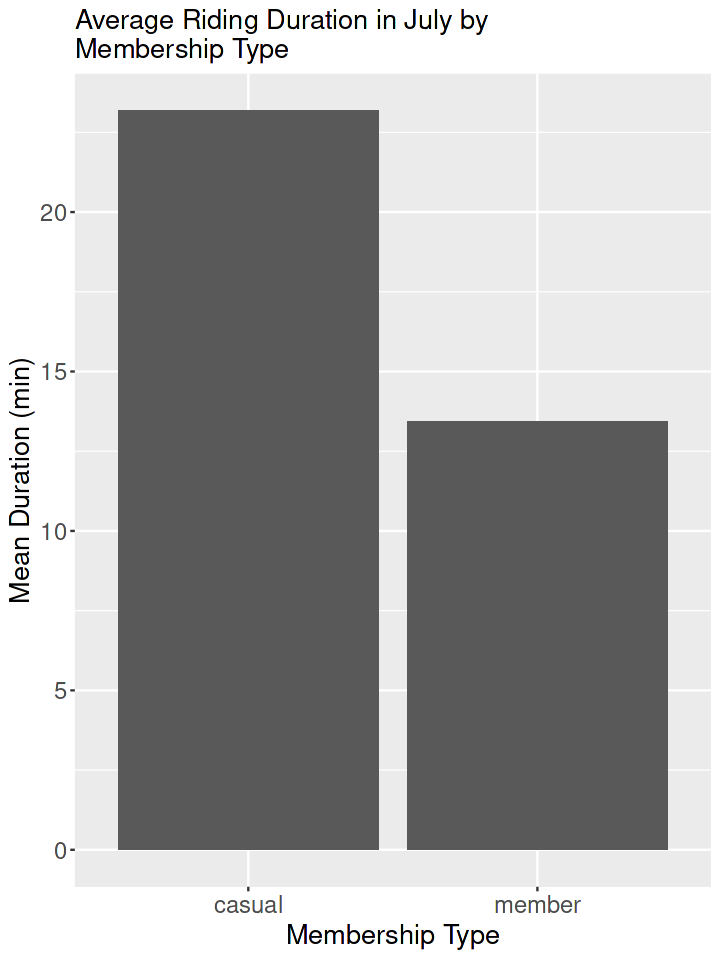

In [19]:
tripdata_v2 %>% 
  group_by(member_casual) %>% 
  summarize(average_duration = mean(ride_len)) %>% 
  ggplot(aes(x = member_casual, y = average_duration)) +
  geom_col(position = "dodge") +
  labs(x = "Membership Type", y = "Mean Duration (min)", 
       title = "Average Riding Duration in July by \nMembership Type") + theme_v1

## Image (4) - Visualize the average number of rides by day in July: members vs casual

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


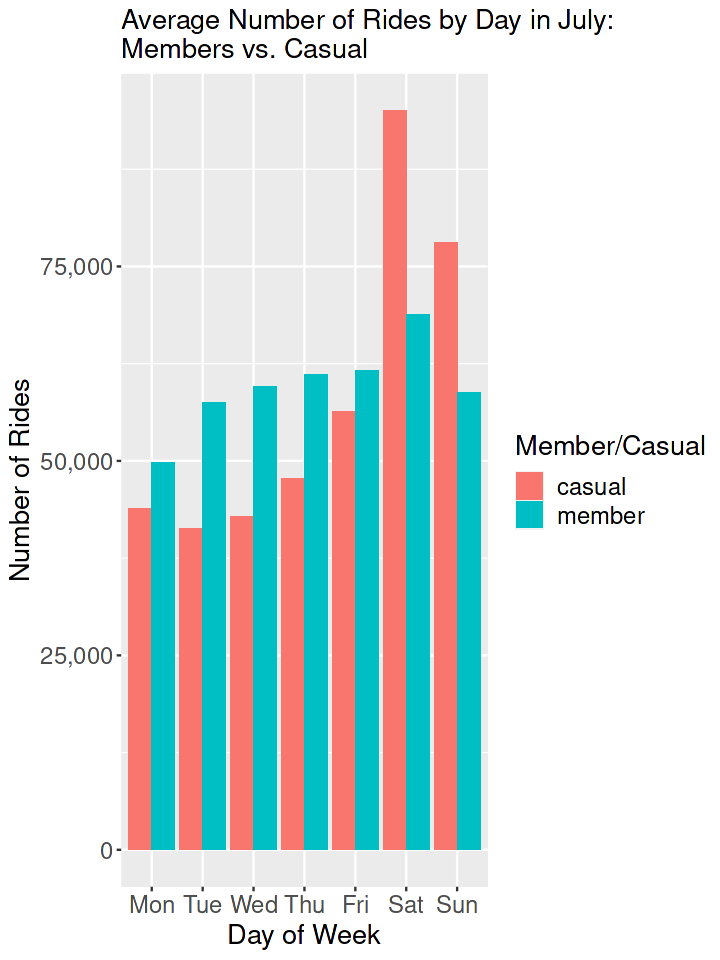

In [20]:
tripdata_v2 %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(member_casual, day_of_week) %>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") + scale_y_continuous(labels = scales::comma) +
  labs(x = "Day of Week", y = "Number of Rides", fill = "Member/Casual",
       title = "Average Number of Rides by Day in July: \nMembers vs. Casual") + theme_v1

## Image (5) - Visualize the usage of different bikes in July: Members vs Casual Riders

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


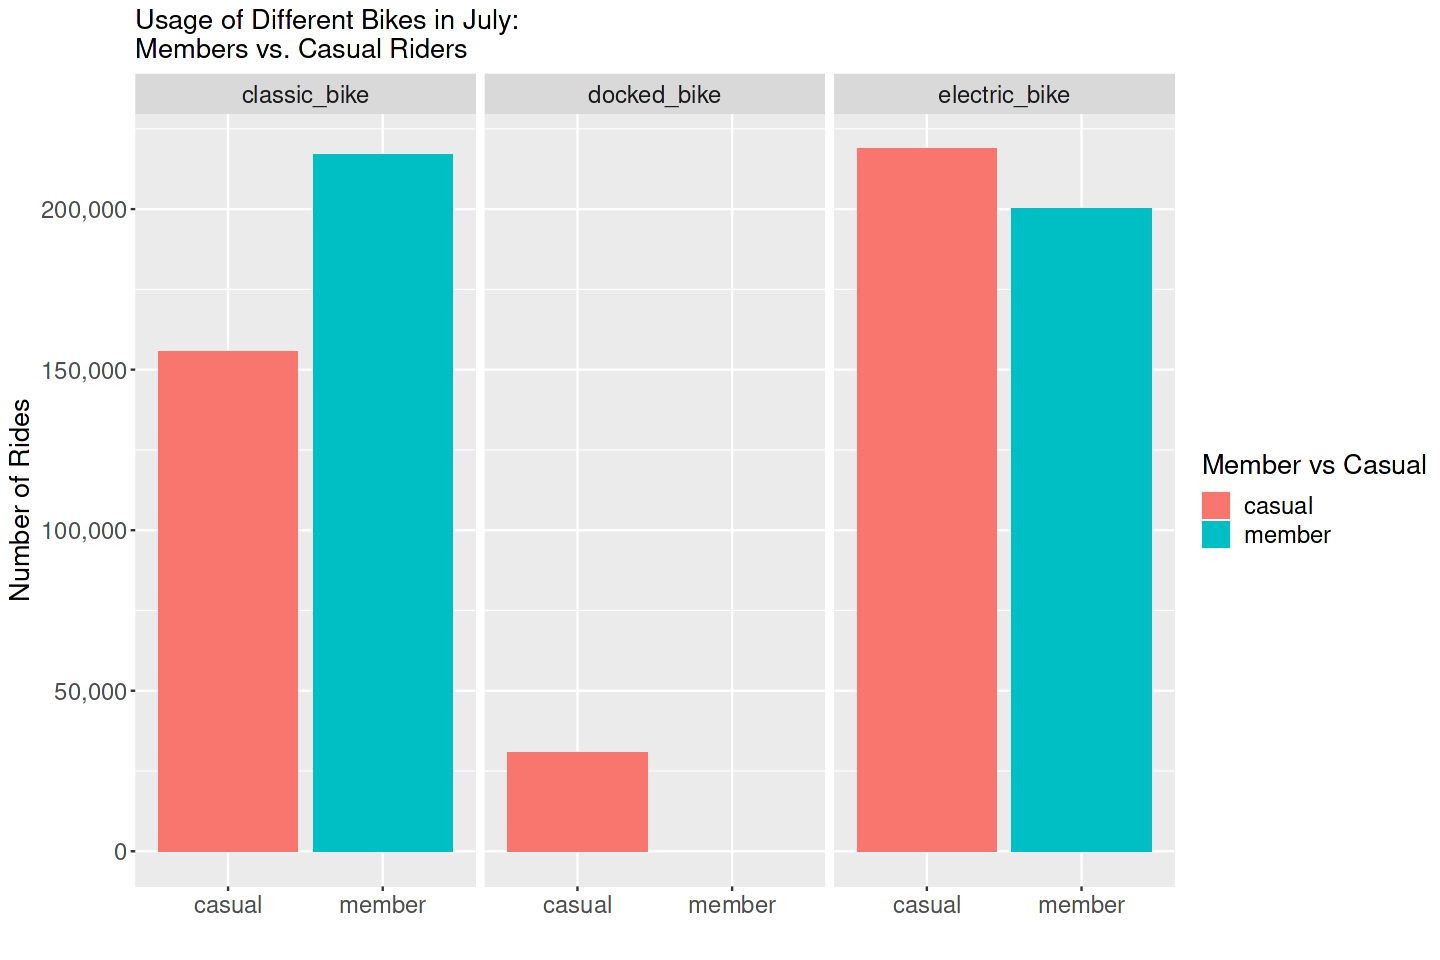

In [21]:
options(repr.plot.width = 12, repr.plot.height = 8)
tripdata_v2 %>% 
  group_by(rideable_type, member_casual) %>% 
  summarize(number_of_rides = n()) %>% 
  drop_na() %>% 
  ggplot(aes(x = member_casual, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  scale_y_continuous(labels = scales::comma) +
  facet_wrap(~rideable_type) +
  labs(fill = "Member vs Casual", x = "", y = "Number of Rides", 
       title = "Usage of Different Bikes in July: \nMembers vs. Casual Riders") + theme_v1

## Image (6) - Visualize the aveage number of rides by hour: Casual Riders

`summarise()` has grouped output by 'hour_of_day'. You can override using the
`.groups` argument.


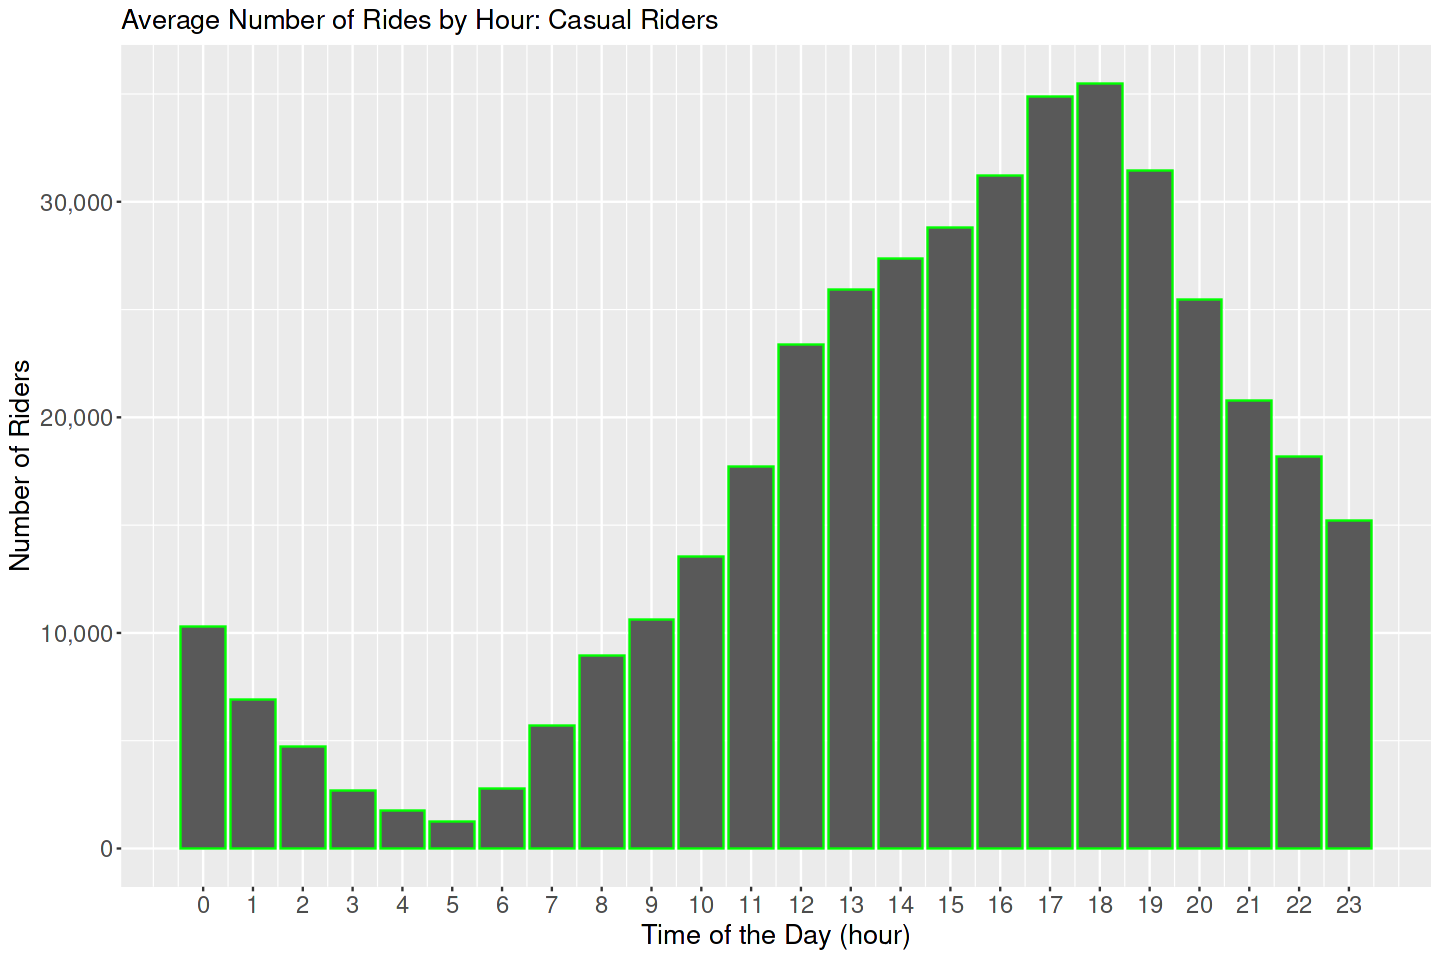

In [22]:
options(repr.plot.width = 12, repr.plot.height = 8)
tripdata_v2 %>%
  filter(member_casual == 'casual') %>%
  group_by(hour_of_day = hour(round_date(started_at, 'hour'))) %>% 
  group_by(hour_of_day, member_casual) %>% 
  summarize(number_of_rides = n()) %>% 
  arrange(-number_of_rides) %>% 
  ggplot(aes(x = hour_of_day, y = number_of_rides)) +
  geom_bar(position = 'dodge', stat = 'identity',color = '#00FF00') + scale_y_continuous(labels = scales::comma) +
  scale_x_continuous(breaks = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)) +
  labs(x = "Time of the Day (hour)", y = "Number of Riders", 
       fill = "Casual",
       title = "Average Number of Rides by Hour: Casual Riders") + theme_v1

# (5) Act
**Image 1** shows that the bike users (both member and casual) are significantly using in the weekends. Additionally, throughout the weekdays, the users are active on Friday. 
**Image 2** shows that the casual users are taking electric bikes and classic bikes in the weekends. 
**Image 4 and 5** show the number of users between members and casual by categorizing the type of bikes.  

* Marketing team can perform their online promotion every weekends and Friday (or even Thursday). 
* This can be done through sending out email, newsletter and notification on application.
* The casual users are more taking classic and electric bikes which can be interrepted as the users are likely to use the service one-time to a certain long distance. This is a great asset to create a desirable package for them to become a regular membership. 
* This users' behaviour can be explored as a next step by correlating with tourist activity during summer (July). Therefore, this marketing campaign can be collaborated with tours and travels companies. 

**Image 3** shows that the duration of casual users are greater than of the members. 
* This supplements the image 2 interpretion. Casual riders are likely to use bikes once for greater distance.

**Image 6** shows that the average number of rides by hour in July by casual users. 
* This can be interepted as the casual users are likely to behave throughout the day.
* The casual users are likely to use bikes in the evening (around 16:00 to 19:00). This could be after their work. 
* The correlation can be performed using weather data as a next step. The daylight can influence this behaviour so that the additional equipment on bikes (such as lights, indicators, signals, etc.) can be added for security. 

# Next step for data science team
* Inferential statistic can be performed using Python and R. 
* This indicator is most likely to be influenced by weather data and geographical locations.
* Secondly, the indicator is also likely to be related to bike infrastructure in the city in terms of safety.